In [1]:
from layers.Dense_network import Dense
from layers.Rough_network import Rough
from layers.RBF_network import RBF
from layers.Rough_RBF import Rough_RBF
from losses.MeanSquaredError import MSE
from losses.CategoricalCrossEntropy import Entropy
from losses.Emotional import Emotion2
from utils import sliding_window, plot_curve_fitting, plot_regression
from compile import compile
import numpy as np
from utils import one_hot_encoder, plot_confusion_matrix, visualize2D_data
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from layers.Flexible_Dense import flexible_Dense

In [2]:
path = 'data\\ECG Datasets.xlsx'
x=pd.read_excel(path, header=None).to_numpy()[1:].astype('float32')

In [3]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
data = sliding_window(x, 4)
X = data[:, :-2]
Y = data[:,-2:]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.5, shuffle=False)

In [4]:
layer0 = Dense(input_size=2, output_size=3, activation='sigmoid', weights_init_method='xavier')
layer1 = Dense(input_size=3, output_size=3, activation='sigmoid', weights_init_method='xavier')
layer2 = Dense(input_size=3, output_size=2, activation='linear')
model = compile([layer0, layer1, layer2])

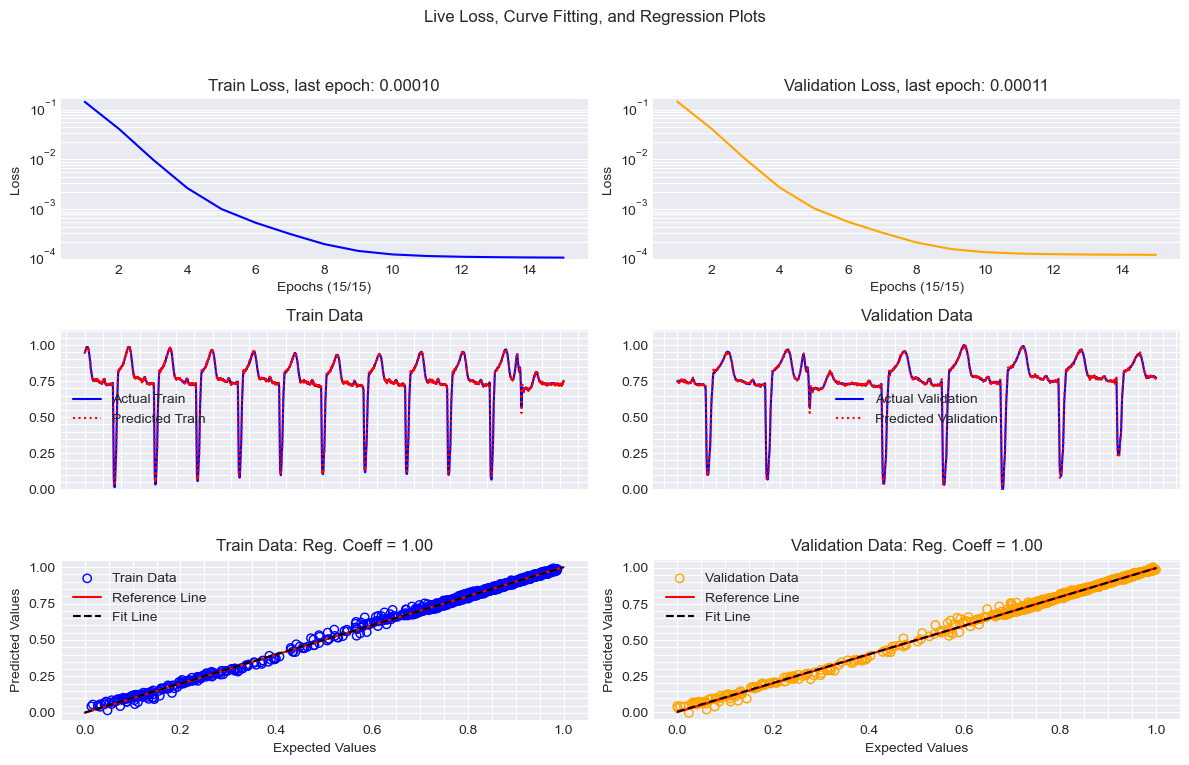

In [5]:
emotion = Emotion2(Y_train.shape[1])
history = model.levenberg_mar(X_train, X_val, Y_train, Y_val, emotion, plot_reg=True, plot_fitting=True)

Test MSE is 0.00013


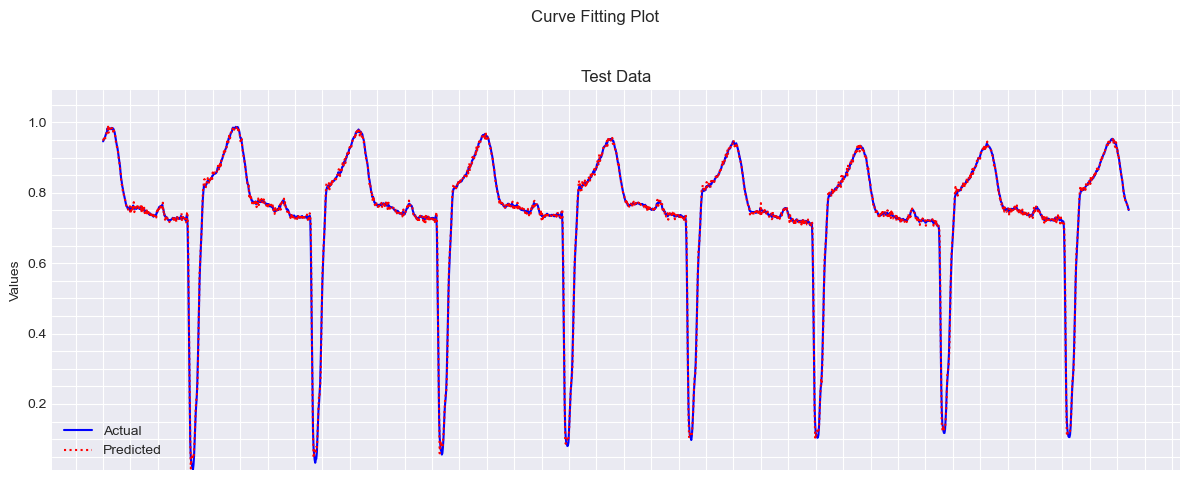

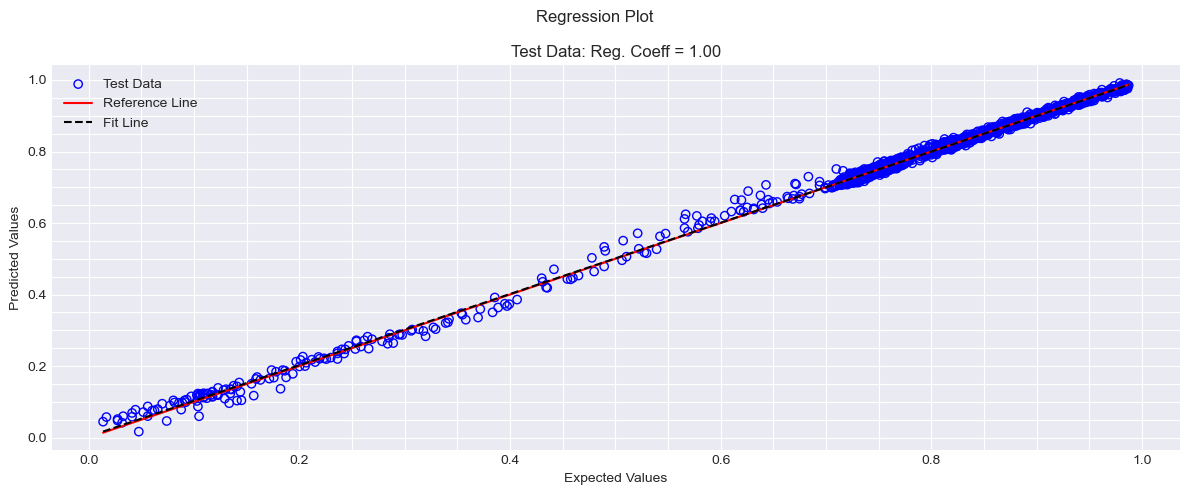

In [6]:
Y_test_predicted = model(X_test)
mse = MSE.forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test[:,0], Y_test_predicted[:,0])
plot_regression(Y_test[:,0], Y_test_predicted[:,0])

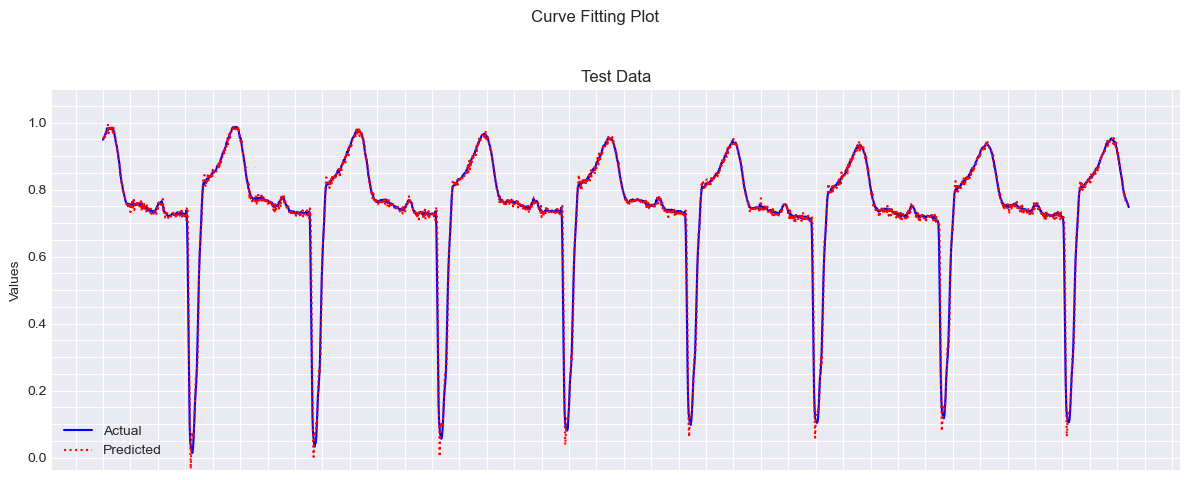

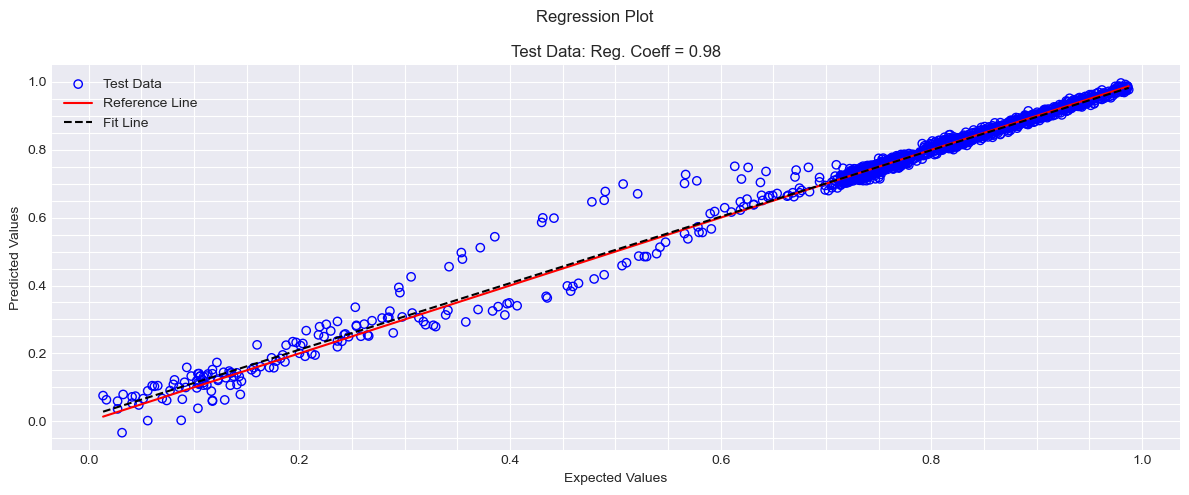

In [7]:
plot_curve_fitting(Y_test[:,1], Y_test_predicted[:,1])
plot_regression(Y_test[:,1], Y_test_predicted[:,1])